# Visualisation journalier de vente 

In [87]:
import pandas as pd 

vente_not_seasonal  = pd.read_csv('../data/reports/ventes_not_seasonal.csv', index_col='DateTime', parse_dates=True)

In [88]:
print(vente_not_seasonal.head().to_string())
print('\n')
print(f'Segmeation par taille qunatité : {vente_not_seasonal['QuantityCluster'].value_counts()}')

                         ItemCode  ItemName  CategoryCode            CategoryName  QuantityKg  UnitPrice  WholesalePrice  LossRate  QuantityCluster  Margin  NetMargin  MarginRate  Margin_Loss_Ratio_pct ClusterLabel        Date
DateTime                                                                                                                                                                                                                          
2020-07-01 16:27:36.983         0  Amaranth             0  Flower/Leaf Vegetables       0.920        6.0            3.88     18.52                0    2.12   1.727376  546.391753            2950.279442      Vente 1  2020-07-01
2020-07-03 09:19:18.438         0  Amaranth             0  Flower/Leaf Vegetables       0.886        6.0            3.88     18.52                0    2.12   1.727376  546.391753            2950.279442      Vente 1  2020-07-03
2020-07-09 09:54:40.682         0  Amaranth             0  Flower/Leaf Vegetables       0.94

Ceci représente les 5 premières lignes de vente. La segmentation des quantités (QuantityCluster) divise les ventes en trois catégories : faible, moyenne et élevée.

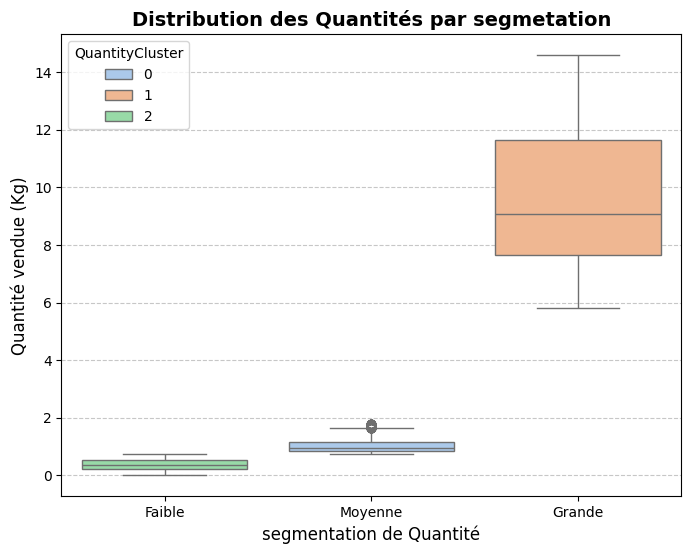

Ordre des clusters triés par quantité moyenne :
1. Cluster 2
2. Cluster 0
3. Cluster 1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


cluster_order = (
    vente_not_seasonal.groupby("QuantityCluster")["QuantityKg"]
    .mean()
    .sort_values()  
    .index
)

plt.figure(figsize=(8,6))
sns.boxplot(
    data=vente_not_seasonal,
    x="QuantityCluster",
    y="QuantityKg",
    hue='QuantityCluster',
    order=cluster_order, 
    palette="pastel"
)

plt.title("Distribution des Quantités par segmetation", fontsize=14, fontweight="bold")
plt.xlabel("segmentation de Quantité", fontsize=12)
plt.ylabel("Quantité vendue (Kg)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks([0,1,2], ["Faible", "Moyenne", "Grande"])  # renommer les clusters

plt.show()

print("Ordre des clusters triés par quantité moyenne :")
for i, cluster in enumerate(cluster_order):
    print(f"{i+1}. Cluster {cluster}")
    
  
 

Le cluster 0 représente les ventes avec une quantité moyenne.

Le cluster 1 représente les ventes avec une grande quantité.

Le cluster 2 représente les ventes avec une faible quantité.

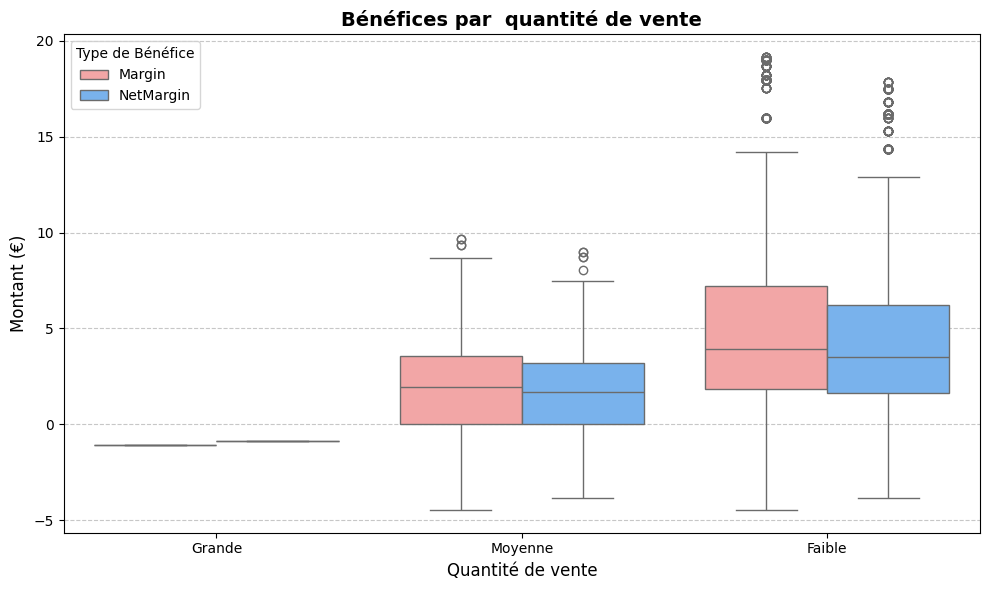

Ordre des clusters triés par quantité:
1. Cluster 1
2. Cluster 0
3. Cluster 2


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


cluster_order = vente_not_seasonal.groupby('QuantityCluster')['QuantityKg'].mean().sort_values(ascending=False).index

ventes_melted = vente_not_seasonal.melt(
    id_vars="QuantityCluster",
    value_vars=["Margin", "NetMargin"],
    var_name="Type de Bénéfice",
    value_name="Montant"
)

plt.figure(figsize=(10,6))
sns.boxplot(
    data=ventes_melted,
    x="QuantityCluster",
    y="Montant",
    hue="Type de Bénéfice",
    order=cluster_order,
    palette=["#FF9999", "#66B2FF"]
)

plt.title("Bénéfices par  quantité de vente", fontsize=14, fontweight="bold")
plt.xlabel("Quantité de vente", fontsize=12)
plt.ylabel("Montant (€)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Type de Bénéfice")
plt.xticks(ticks=[0, 1, 2], labels=["Grande", "Moyenne", "Faible"])
plt.tight_layout()
plt.show()



print("Ordre des clusters triés par quantité:")
for i, cluster in enumerate(cluster_order):
    print(f"{i+1}. Cluster {cluster}")
   

Ventes en faibles quantités : Bénéfices élevés mais très variables. La marge brute est légèrement supérieure à la marge nette. Les ventes exceptionnelles sont particulièrement profitables.

Ventes en quantités moyennes : Bénéfices croissants avec l’augmentation des quantités. La marge brute reste légèrement supérieure à la marge nette. Certaines ventes se révèlent particulièrement rentables.

Ventes en quantités élevées : Bénéfices très faibles, voire négatifs, sans variation notable. La marge brute et la marge nette sont quasiment identiques.

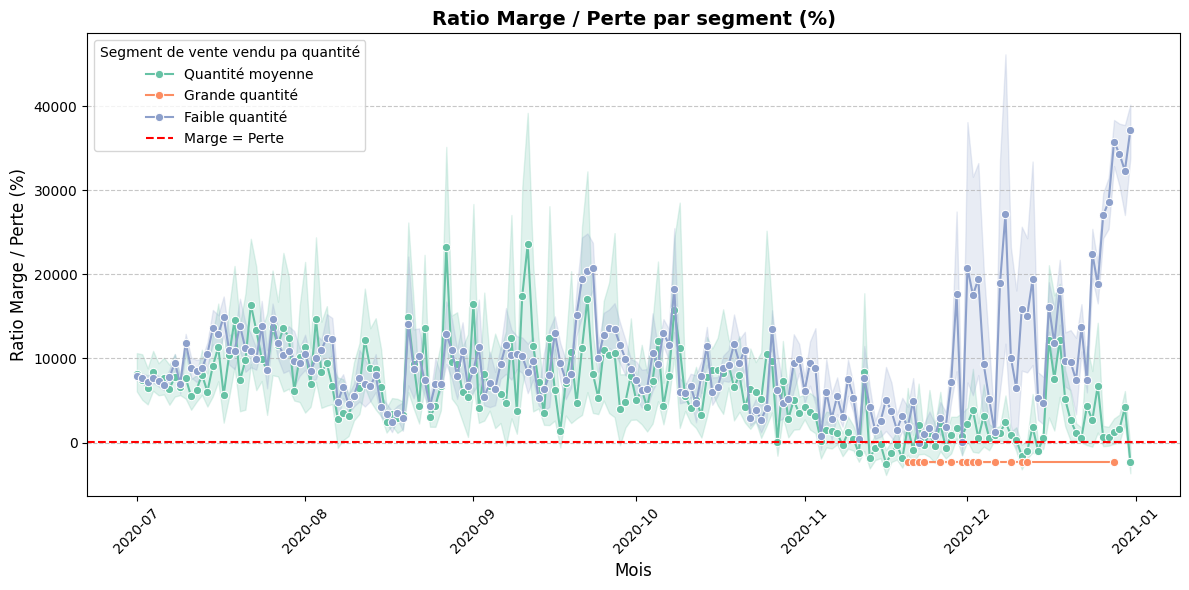

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

vente_not_seasonal['Date'] = pd.to_datetime(vente_not_seasonal['Date'])


cluster_labels = {0: "Quantité moyenne", 1: "Grande quantité", 2: "Faible quantité"}
vente_not_seasonal['Cluster_Label'] = vente_not_seasonal['QuantityCluster'].map(cluster_labels)


plt.figure(figsize=(12,6))
sns.lineplot(
    data=vente_not_seasonal, 
    x='Date', 
    y='Margin_Loss_Ratio_pct', 
    hue='Cluster_Label', 
    marker='o', 
    palette="Set2"
)

plt.title("Ratio Marge / Perte par segment (%)", fontsize=14, fontweight="bold")
plt.xlabel("Mois", fontsize=12)
plt.ylabel("Ratio Marge / Perte (%)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.axhline(100, color='red', linestyle='--', label='Marge = Perte')
plt.legend(title="Segment de vente vendu pa quantité")
plt.tight_layout()
plt.show()




Les ventes de petites et moyennes quantités deviennent rentables dès juillet et jusqu’à la mi-octobre, avec un ratio supérieur à 100 %.

Les ventes en grandes quantités n’apparaissent qu’à partir de la mi-novembre et demeurent légèrement en dessous de 100 %, indiquant qu’elles ne génèrent pas encore de marge suffisante pour compenser les pertes.

Des pics sont observés pour les ventes en faibles quantités dès le début du mois de décembre, signalant une période de forte rentabilité pour ce segment

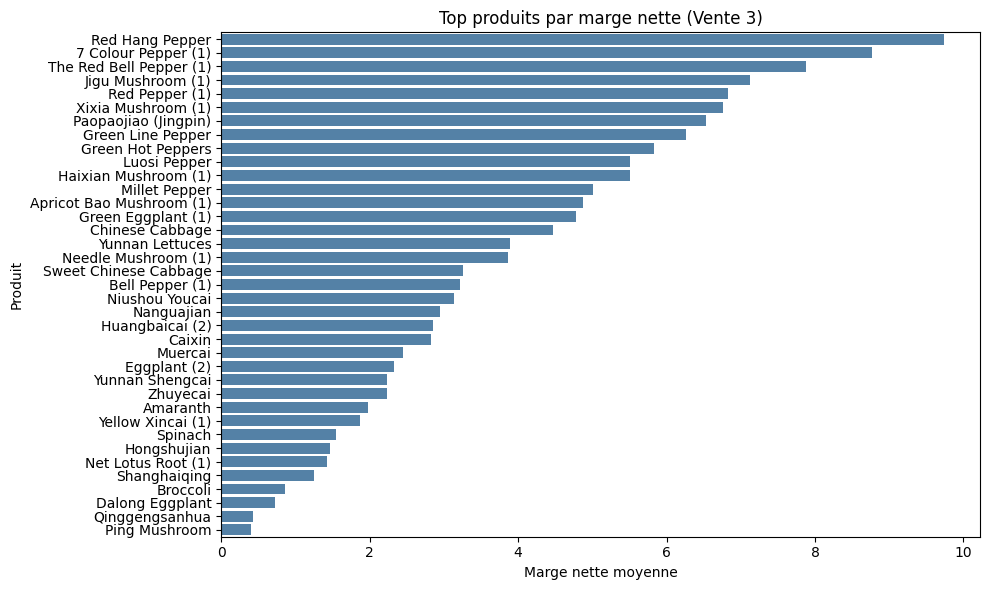

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


cluster2 = vente_not_seasonal[vente_not_seasonal['QuantityCluster'] == 2]


marge_par_produit = cluster2.groupby('ItemName')[['Margin', 'NetMargin']].mean().sort_values('NetMargin', ascending=False)

plt.figure(figsize=(10,6))

sns.barplot(
    x='NetMargin', 
    y=marge_par_produit.index, 
    data=marge_par_produit.reset_index(),
    color='steelblue'
)

plt.title("Top produits par marge nette (Vente 3)")
plt.xlabel("Marge nette moyenne")
plt.ylabel("Produit")
plt.tight_layout()
plt.show()


Après avoir filtré les ventes de petites quantités présentant une rentabilité élevée :

Les produits affichent des marges nettes supérieures. Parmi eux, Red Hang Pepper et 7 Colour Pepper se distinguent comme des produits phares (inportantes).

Ces produits devraient être priorisés dans les actions promotionnelles et la gestion des stock

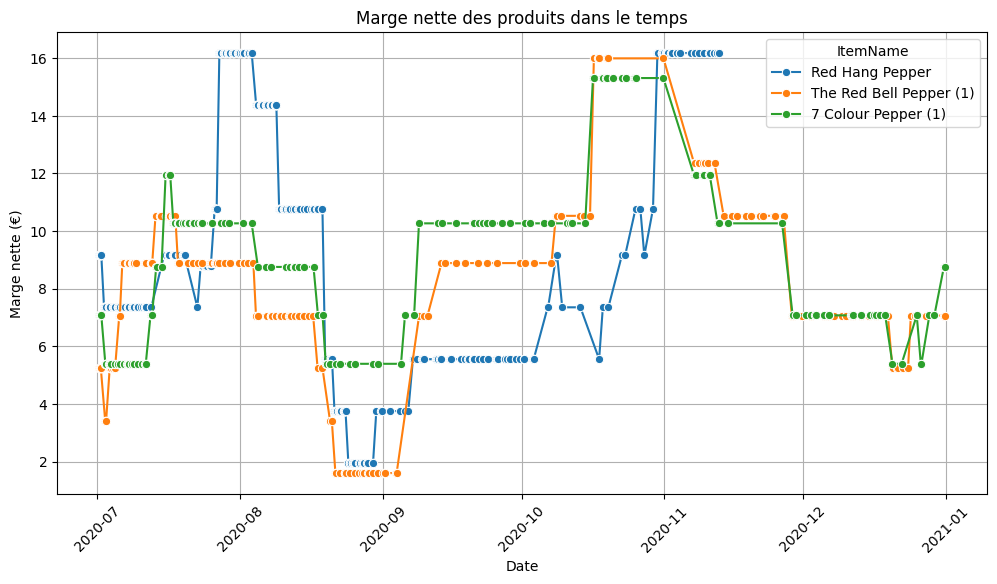

In [ ]:
import pandas as pd

vente_not_seasonal['Date'] = pd.to_datetime(vente_not_seasonal['Date'])

produits = ['Red Hang Pepper', '7 Colour Pepper (1)' , 'The Red Bell Pepper (1)'] 

data_produits = vente_not_seasonal[vente_not_seasonal['ItemName'].isin(produits)]

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='NetMargin', hue='ItemName', data=data_produits, marker='o')
plt.title("Marge nette des produits dans le temps")
plt.xlabel("Date")
plt.ylabel("Marge nette (€)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



La période d’août 2020 et ses performances constituent des atouts à valoriser, suggérant des opportunités d’optimisation saisonnière.

La faible marge ainsi que la baisse générale observée en fin d’année 2020 méritent une analyse approfondie (coûts, stratégie de prix, évolution de la demande).

Il est recommandé de prioriser les produits stables, tels que 7 Colour Pepper (1), afin de constituer une base fiable, tout en investiguant les causes des fluctuations afin de maximiser la rentabilité globale.

# Visualisation saisonnalité de vente

In [112]:
import pandas as pd 

ventes  = pd.read_csv('../data/reports/ventes_seasonal.csv', index_col='SaleDate', parse_dates=True)

In [113]:
ventes.head()

,QuantityKg,UnitPrice,WholesalePrice,LossRate,QuantityCluster,AvgPriceKg,RelativeLossRate,MarginRate,segmentation
SaleDate,,,,,,,,,
2020-07-01,5.930010,8.675374,8.180629,5.061292,7.025530,5.087176,5.021936,6.702633,2
2020-07-02,5.649817,8.260232,7.758701,5.062002,6.580626,5.093641,5.043062,6.735604,2
2020-07-03,5.545120,7.829149,7.371785,5.064460,6.255732,5.076635,5.058549,6.666888,2
2020-07-04,5.520626,7.847915,7.360410,5.059724,6.200490,5.080515,5.057897,6.733428,2
2020-07-05,5.535148,7.787585,7.297714,5.064749,6.154838,5.071939,5.060393,6.744012,2


Ceci représente les 5 premières lignes de vente selon la saisonnalité.

In [24]:
ventes.shape

(184, 9)

Nous disposons de ventes couvrant une période de 6 mois, de juillet à décembre, représentant un total de 184 transactions.

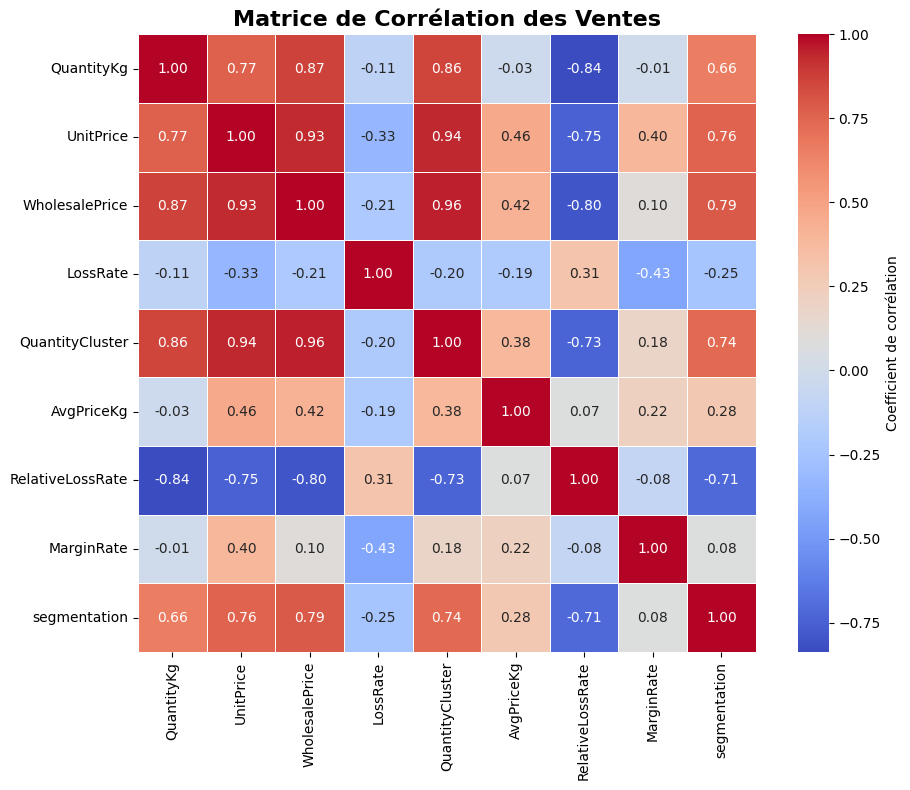

In [ ]:
import  matplotlib.pyplot as plt
import seaborn as sns

ventes_corr = ventes.corr()

plt.figure(figsize=(10,8))
sns.heatmap( 
    ventes_corr, 
    annot=True, 
    fmt=".2f",         
    cmap="coolwarm",    
    cbar_kws={'label': 'Coefficient de corrélation'},
    linewidths=0.5,      
    linecolor='white',
    square=True)


plt.title("Matrice de Corrélation des Ventes", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

Le graphique de corrélation montre que le taux de perte relatif est fortement inversement corrélé à la quantité vendue, au prix unitaire et au prix de gros.

Autrement dit, lorsque les ventes augmentent ou que le prix est plus élevé, le taux de perte tend à diminuer.

Cela indique que les ventes les plus importantes et les produits les plus chers sont généralement plus rentables, avec un taux de perte relatif plus faibl

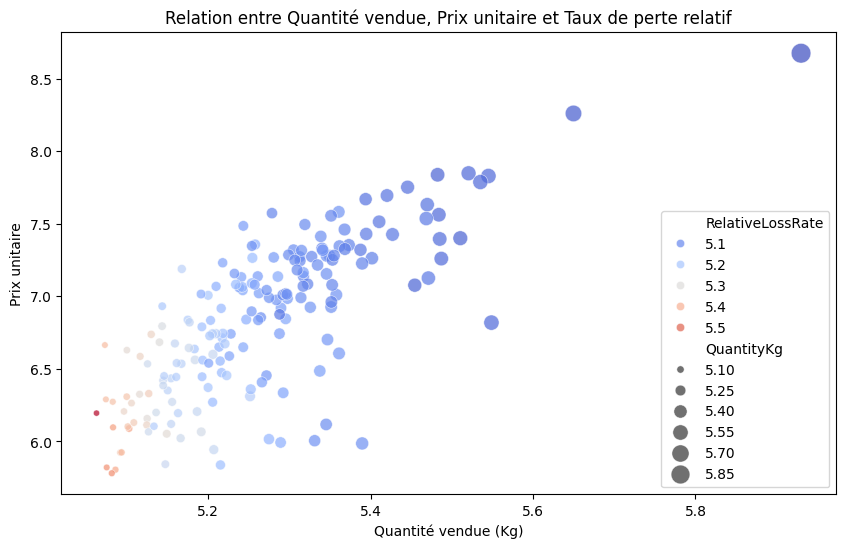

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.scatterplot(
    data=ventes, 
    x='QuantityKg', 
    y='UnitPrice', 
    hue='RelativeLossRate', 
    palette='coolwarm',  
    size='QuantityKg',  
    sizes=(20, 200),
    alpha=0.7
)

plt.title("Relation entre Quantité vendue, Prix unitaire et Taux de perte relatif")
plt.xlabel("Quantité vendue (Kg)")
plt.ylabel("Prix unitaire")

plt.show()


Ce graphique montre que plus la quantité vendue est élevée, plus le prix tend à augmenter, ce qui reflète des ventes rentables.

Les produits à bas prix présentent des pertes plus importantes, tandis que les produits à prix élevé affichent généralement des pertes plus faibles.

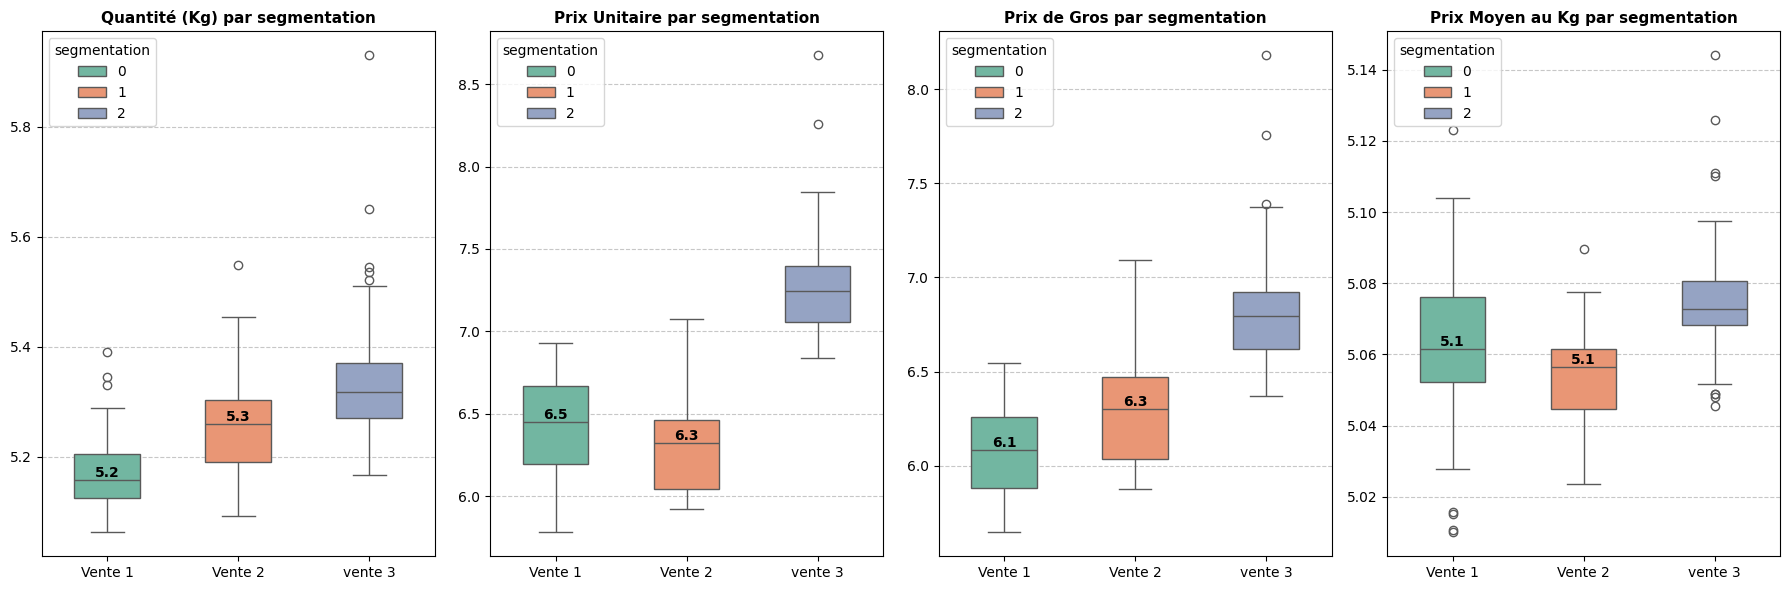

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


variables = ['QuantityKg', 'UnitPrice', 'WholesalePrice', 'AvgPriceKg']
titles = {
    'QuantityKg': "Quantité (Kg)",
    'UnitPrice': "Prix Unitaire",
    'WholesalePrice': "Prix de Gros",
    'AvgPriceKg': "Prix Moyen au Kg"
}


seg_labels = {0: "Vente 1", 1: "Vente 2" , 2: "vente 3" }

fig, axes = plt.subplots(1, 4, figsize=(18,6))

for ax, var in zip(axes, variables):
    sns.boxplot(
        data=ventes, y=var, x="segmentation", hue="segmentation", ax=ax,
        palette='Set2', width=0.5
    )
    ax.set_title(f"{titles[var]} par segmentation", fontsize=11, fontweight="bold")
    ax.set_xlabel("")  
    ax.set_ylabel("")  
    ax.grid(axis="y", linestyle="--", alpha=0.7)


     ---
    medians = ventes.groupby("segmentation")[var].median()
    for xtick in [0, 1]:
        median_val = medians[xtick]  
        ax.text(
            xtick, medians[xtick],         
            f"{median_val:.1f}",         
            ha='center', va='bottom',
            fontsize=10, fontweight="bold", color="black"
        )
        
    # Remplacer 0/1 par Vente 1 / Vente 2
    ax.set_xticks([0,1,2])
    ax.set_xticklabels([seg_labels[0], seg_labels[1] ,seg_labels[2]])

plt.tight_layout()
plt.show()


L’analyse de distribution montre que le segment de vente 3 se caractérise par des volumes élevés, un prix unitaire et un prix moyen supérieurs.

Tandis que les segments de vente 1 et vente 2, bien que minoritaires, présentent des prix et des quantités faibles.

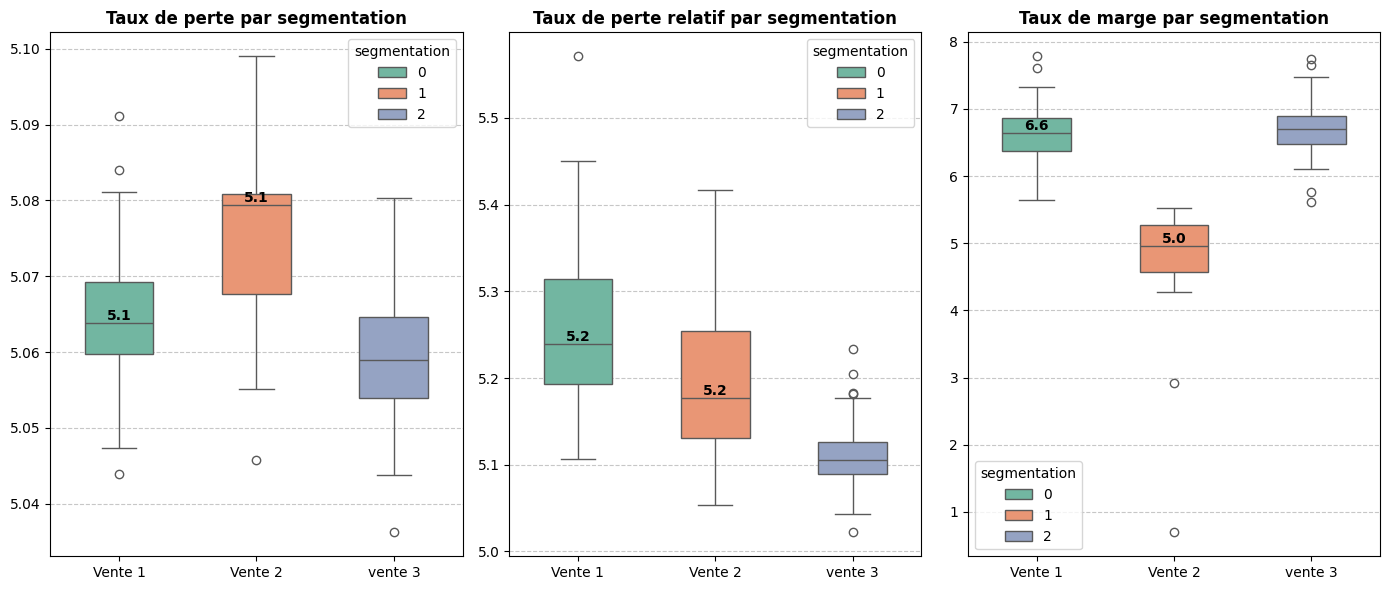

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['LossRate', 'RelativeLossRate', 'MarginRate']
titles = {
    'LossRate': 'Taux de perte',
    'RelativeLossRate': 'Taux de perte relatif',
    'MarginRate': 'Taux de marge'
}


seg_labels = {0: "Vente 1", 1: "Vente 2" , 2: "vente 3"}


fig, axes = plt.subplots(1, 3, figsize=(14,6))

for ax, var in zip(axes, variables):
    sns.boxplot(
        data=ventes, y=var, x="segmentation", ax=ax, 
        palette="Set2", width=0.5 ,  hue="segmentation"
    )
    ax.set_title(f"{titles[var]} par segmentation", fontsize=12, fontweight="bold")
    ax.set_xlabel("")  
    ax.set_ylabel("")  
    ax.grid(axis='y', linestyle='--', alpha=0.7)
        
    
    medians = ventes.groupby("segmentation")[var].median()
    for xtick in [0, 1]:
        median_val = medians[xtick]  
        ax.text(
            xtick, medians[xtick],           
            f"{median_val:.1f}",           
            ha='center', va='bottom',
            fontsize=10, fontweight="bold", color="black"
        )

        

    ax.set_xticks([0,1,2])
    ax.set_xticklabels([seg_labels[0], seg_labels[1] ,seg_labels[2]])

plt.tight_layout()
plt.show()


Les ventes  3 ont un taux de perte relatif plus faible et une marge correcte, ce qui les rend globalement plus stables et rentables.

Les ventes 2 sont moins rentables malgré des pertes similaires aux autres segments.

Les ventes  1 ont une bonne marge, mais le taux de perte relatif reste élevé.

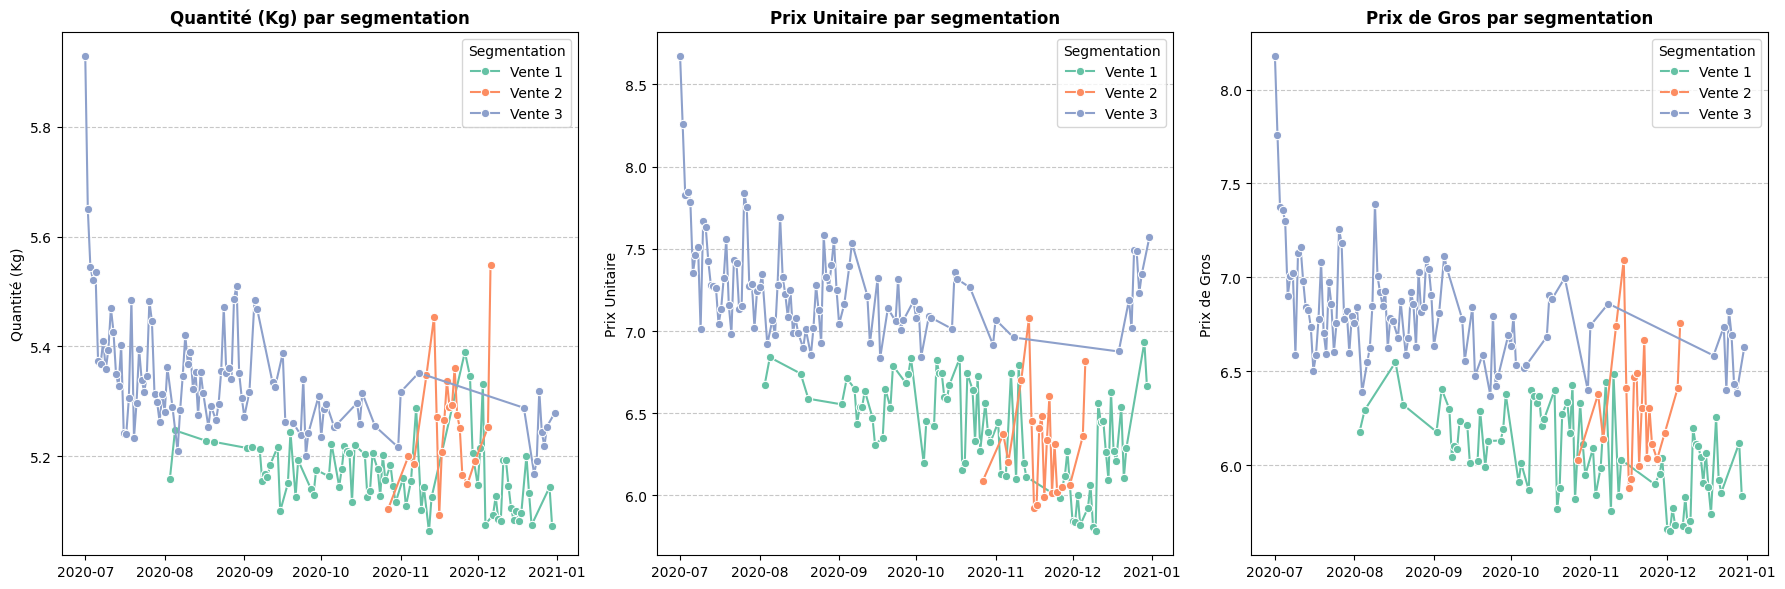

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


variables = ['QuantityKg', 'UnitPrice', 'WholesalePrice', 'AvgPriceKg']
titles = {
    'QuantityKg': "Quantité (Kg)",
    'UnitPrice': "Prix Unitaire",
    'WholesalePrice': "Prix de Gros",
    'AvgPriceKg': "Prix Moyen au Kg"
}

# Mapping des labels de segmentation
seg_labels = {0: "Vente 1", 1: "Vente 2" , 2: "vente 3"}

fig, axes = plt.subplots(1, 3, figsize=(18,6))

for ax, var in zip(axes, variables):
    sns.lineplot(
        data=ventes, x=ventes.index, y=var, hue='segmentation', ax=ax, palette="Set2", marker='o'
    )

    ax.set_title(f"{titles[var]} par segmentation", fontsize=12, fontweight="bold")
    ax.set_xlabel('')
    ax.set_ylabel(titles[var])                                                                                      
    ax.grid(axis='y', linestyle='--', alpha=0.7)
   
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=['Vente 1', 'Vente 2' ,'Vente 3'], title='Segmentation')
    
    
    
plt.tight_layout()
plt.show()


Vente 2 semble avoir une augmentation notable des prix (unitaire et gros) et une variation dans la quantité vers la fin de la période, suggérant une possible stratégie de prix ou une demande accrue. 

Vente 3 maintient une certaine stabilité, tandis que Vente 1 montre des variations modérées.

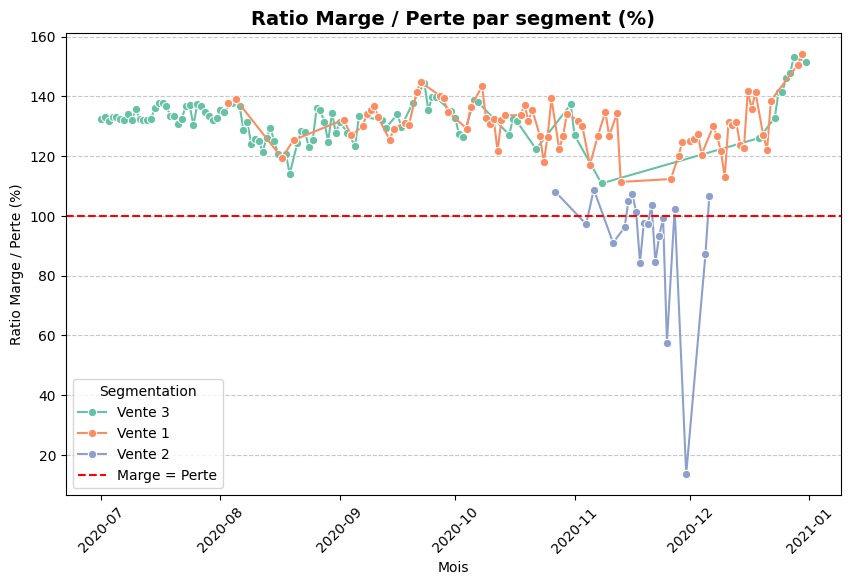

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création du ratio en pourcentage
ventes['Margin_Loss_Ratio_pct'] = (ventes['MarginRate'] / ventes['LossRate']) * 100

# Mapping des segments vers des labels personnalisés
segment_labels = {0: 'Vente 1', 1: 'Vente 2', 2: 'Vente 3'}
ventes['segmentation_label'] = ventes['segmentation'].map(segment_labels)

# Visualisation
plt.figure(figsize=(10,6))
sns.lineplot(
    data=ventes,
    x='SaleDate',
    y='Margin_Loss_Ratio_pct',
    hue='segmentation_label',  # Utilisation des labels personnalisés
    marker='o',
    palette="Set2"
)

plt.title("Ratio Marge / Perte par segment (%)", fontsize=14, fontweight="bold")
plt.xlabel("Mois")
plt.ylabel("Ratio Marge / Perte (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Ligne de référence à 100%
plt.axhline(100, color='red', linestyle='--', label='Marge = Perte')

plt.legend(title='Segmentation')
plt.show()


Le vente 1 et 3 maintiennent des marges positives avec une amélioration vers la fin de la période.

Le vente 2 montre une dégradation marquée en fin d'année 2020, passant d'un équilibre à une perte notable.

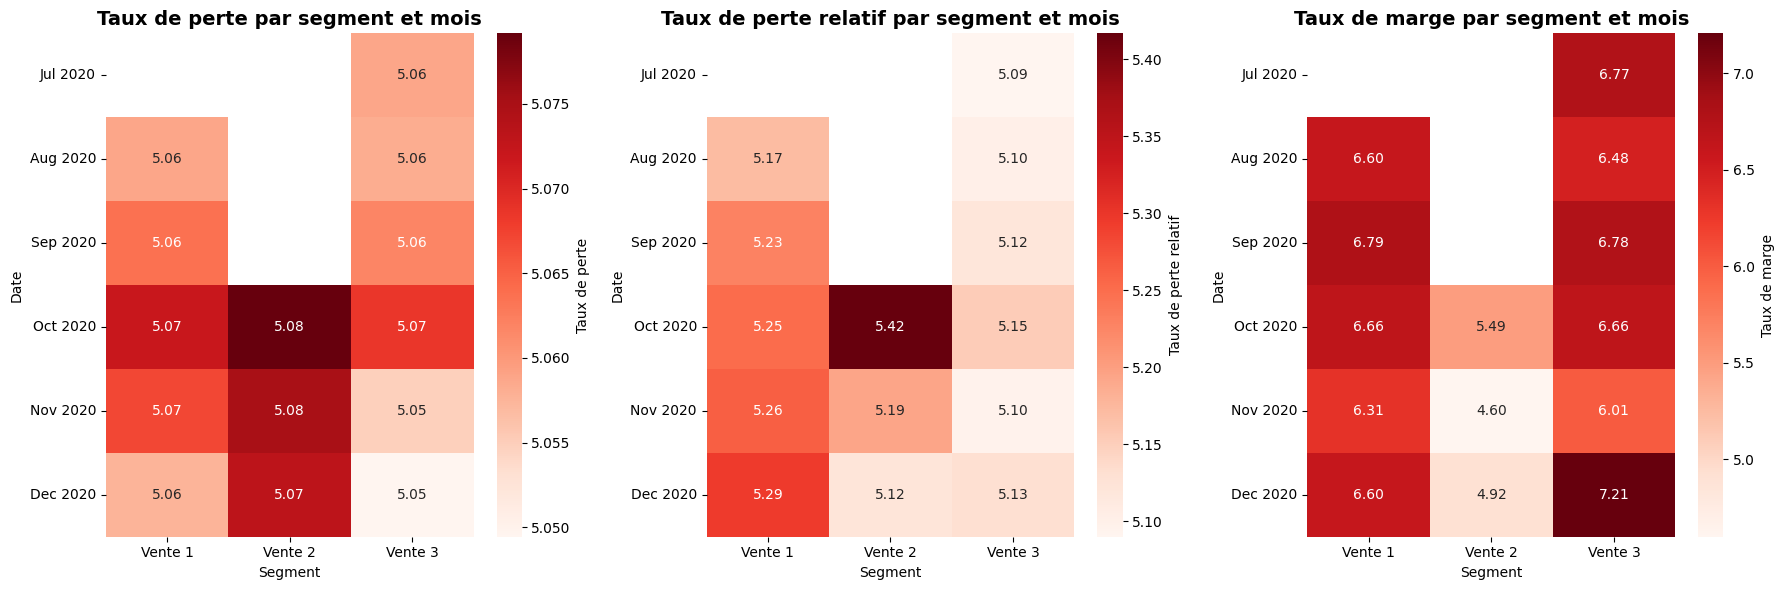

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Réinitialiser l'index pour que SaleDate devienne une colonne
ventes = ventes.reset_index()  # SaleDate devient une colonne
ventes['Date'] = pd.to_datetime(ventes['SaleDate'])
ventes = ventes.sort_values('Date')

variables = ['LossRate', 'RelativeLossRate', 'MarginRate']
titles = {
    'LossRate': 'Taux de perte',
    'RelativeLossRate': 'Taux de perte relatif',
    'MarginRate': 'Taux de marge'
}
seg_labels = {0: "Vente 1", 1: "Vente 2", 2: "Vente 3"}

fig, axes = plt.subplots(1, 3, figsize=(18,6))

for ax, var in zip(axes, variables):
    heatmap_data = []
    for seg, seg_df in ventes.groupby('segmentation'):
        seg_monthly = seg_df.set_index('Date')[var].resample('ME').mean()
        heatmap_data.append(seg_monthly.rename(seg_labels[seg]))
    
    
    heatmap_data = pd.concat(heatmap_data, axis=1)
    
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".2f",
        cmap="Reds",
        cbar_kws={'label': titles[var]},
        ax=ax
    )
    
    ax.set_title(f"{titles[var]} par segment et mois", fontsize=14, fontweight='bold')
    ax.set_xlabel("Segment")
    ax.set_yticklabels([d.strftime('%b %Y') for d in heatmap_data.index], rotation=0)

plt.tight_layout()
plt.show()


Taux de perte : Varie entre 5,05 et 5,08. Les valeurs sont stables, avec un pic léger pour Vente 2 en octobre (5,08).

Taux de perte relatif : Oscille entre 5,09 et 5,42. Vente 2 montre une perte relative plus élevée en octobre (5,42), tandis que les autres segments restent autour de 5,10-5,23.

Taux de marge : Varie de 4,60 à 7,21. Vente 3 domine avec une marge élevée en décembre

Les pertes sont relativement stables, mais la marge varie significativement. Vente 3 offre la meilleure rentabilité en fin d'année, tandis que Vente 2 montre une faiblesse en novembre.